In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [7]:
df = pd.read_csv('oecd_data_cleaned.csv')

In [8]:
df.head()

,country,region,health_exp_pct_gdp,continent,iso3,year,gdp_per_capita,gdp,gdp_volume_market_prices,cpi,...,other_nonproperty_tax_pct_gdp,property_income_pct_gdp,total_expenditure,total_revenue,total_expense_pct_gdp,total_revenue_pct_gdp,public_finance_trait,developing,life_expectancy_outcome_3,life_expectancy_outcome_5
0,Australia,Oceania,6.467,Oceania,AUS,1990.0,17838.1,4.136590e+11,8.625100e+11,0.494619,...,NaN,1.83,NaN,NaN,NaN,NaN,NaN,0.0,77.9,77.8
1,Australia,Oceania,6.762,Oceania,AUS,1991.0,18177.5,4.166640e+11,8.510460e+11,0.510977,...,NaN,2.08,NaN,NaN,NaN,NaN,NaN,0.0,77.9,78.1
2,Australia,Oceania,6.828,Oceania,AUS,1992.0,19157.7,4.323100e+11,8.767390e+11,0.515928,...,NaN,2.28,NaN,NaN,NaN,NaN,NaN,0.0,77.8,78.4
3,Australia,Oceania,6.844,Oceania,AUS,1993.0,20184.9,4.552010e+11,9.126430e+11,0.524968,...,NaN,2.74,NaN,NaN,NaN,NaN,NaN,0.0,78.1,78.6
4,Australia,Oceania,6.872,Oceania,AUS,1994.0,21432.8,4.826680e+11,9.559860e+11,0.535084,...,0.66,1.98,NaN,2.124420e+11,NaN,44.01,NaN,0.0,78.4,78.9


In [21]:
# Helper function to store models

# List to store the performance metrics of different models
model_performance = []

def store_model_performance(y_true, y_pred, model_name):
    """
    Function to compute MSE and R-squared for given predictions and actual values,
    and store these metrics in a list of dictionaries.

    Args:
    y_true (array-like): Actual values.
    y_pred (array-like): Predicted values from the model.
    model_name (str): Name of the model.

    Returns:
    None: Appends the performance metrics to the global list 'model_performance'.
    """
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    performance_dict = {
        'model_name': model_name,
        'mse': mse,
        'r2': r2
    }

    model_performance.append(performance_dict)

# Baseline Model

## Simple Linear Regression

In [10]:
# Simple Linear Regression: 'public_health_exp_pct_gdp' vs 'life_expectancy_outcome_3'

# Removing rows with NaN values in 'public_health_exp_pct_gdp' and 'life_expectancy_outcome_3'
df_cleaned = df.dropna(subset=['public_health_exp_pct_gdp', 'life_expectancy_outcome_3'])

# Preparing the data with the cleaned dataframe
X_cleaned = df_cleaned[['public_health_exp_pct_gdp']].values
y_cleaned = df_cleaned['life_expectancy_outcome_3'].values

# Splitting the data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=0)

# Creating and fitting the linear regression model with the cleaned data
lr_model_cleaned = LinearRegression()
lr_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Making predictions with the cleaned data
y_pred_cleaned = lr_model_cleaned.predict(X_test_cleaned)

# Calculating metrics for the cleaned data
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

In [22]:
# Storing model performance using the custom function
store_model_performance(y_test_cleaned, y_pred_cleaned, "Simple Linear Regression")

In [26]:
print(model_performance)

[{'model_name': 'Simple Linear Regression', 'mse': 9.235107043166787, 'r2': 0.12124626285332318}]


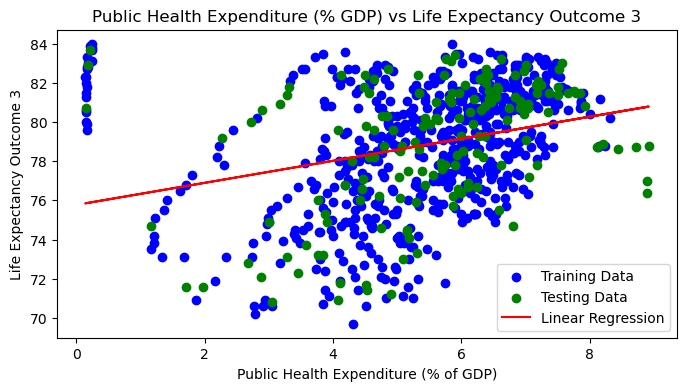

In [24]:
# Visualizing the Simple Linear Regression: 'public_health_exp_pct_gdp' vs 'life_expectancy_outcome_3'

plt.figure(figsize=(8, 4))

# Plotting the training data
plt.scatter(X_train_cleaned, y_train_cleaned, color='blue', label='Training Data')

# Plotting the testing data
plt.scatter(X_test_cleaned, y_test_cleaned, color='green', label='Testing Data')

# Plotting the regression line
line = lr_model_cleaned.coef_[0]*X_cleaned + lr_model_cleaned.intercept_
plt.plot(X_cleaned, line, color='red', label='Linear Regression')

plt.title('Public Health Expenditure (% GDP) vs Life Expectancy Outcome 3')
plt.xlabel('Public Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy Outcome 3')
plt.legend()
plt.show()

# Multiple Regression

In [13]:
# Selecting the predictor variables and ensuring there are no NaN values
predictors = ['public_health_exp_pct_gdp', 'gdp_per_capita', 'education_exp_pct_gdp']
df_cleaned_multiple = df.dropna(subset=predictors + ['life_expectancy_outcome_3'])

X_multiple = df_cleaned_multiple[predictors].values
y_multiple = df_cleaned_multiple['life_expectancy_outcome_3'].values

# Splitting the data into training and testing sets for the multiple regression model
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=0)

# Creating and fitting the multiple regression model
lr_model_multiple = LinearRegression()
lr_model_multiple.fit(X_train_multiple, y_train_multiple)

# Making predictions with the multiple regression model
y_pred_multiple = lr_model_multiple.predict(X_test_multiple)

# Calculating metrics for the multiple regression model
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

In [15]:
print(mse_multiple)
print(r2_multiple)

4.080873140630009
0.5871031588683342


In [27]:
# Storing model performance using the custom function
store_model_performance(y_test_multiple, y_pred_multiple, "Multiple Regression")

print(model_performance)

# Polynomial Regression

In [32]:
# Checking if the selected variables are in the dataset
selected_tax_exp_vars = [
    'personal_income_tax_pct_gdp', 
    'corporate_income_tax_pct_gdp',
    'social_security_contrib_pct_gdp',
    'public_health_exp_pct_gdp',
    'education_exp_pct_gdp',
    'pensions_exp_pct_gdp'
]

# Assuming 'life_expectancy' is the response variable
response_var = 'life_expectancy'

# Check for missing variables in the dataset
missing_vars = [var for var in selected_tax_exp_vars + [response_var] if var not in df.columns]

# If no variables are missing, proceed to prepare the data for polynomial regression
if not missing_vars:
    # Dropping rows with NaN in the selected variables and the response variable
    df_poly = df.dropna(subset=selected_tax_exp_vars + [response_var])

    # Independent variables (tax and expenditure data)
    X_poly = df_poly[selected_tax_exp_vars].values

    # Dependent variable (life expectancy)
    y_poly = df_poly[response_var].values

    # Splitting the data into training and testing sets
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=0)

    # Creating a polynomial regression model (degree 2 for demonstration)
    poly_reg_model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

    # Fitting the model
    poly_reg_model.fit(X_train_poly, y_train_poly)

    # Making predictions
    y_pred_poly = poly_reg_model.predict(X_test_poly)

    # Calculating performance metrics
    mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
    r2_poly = r2_score(y_test_poly, y_pred_poly)

    preparation_status = "Polynomial regression model prepared and evaluated."
else:
    preparation_status = f"Missing variables in the dataset: {missing_vars}"

preparation_status

'Polynomial regression model prepared and evaluated.'

In [33]:
# Storing model performance using the custom function
store_model_performance(y_test_poly, y_pred_poly, "Polynomial Regression (4 degrees)")

print(model_performance)

[{'model_name': 'Simple Linear Regression', 'mse': 9.235107043166787, 'r2': 0.12124626285332318}, {'model_name': 'Multiple Regression', 'mse': 4.080873140630009, 'r2': 0.5871031588683342}, {'model_name': 'Polynomial Regression (4 degrees)', 'mse': 3.96162449735727, 'r2': 0.67101117640279}]


# LASSO Regression

# Ridge Regression

# Others

# Random Forest